# Loading Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif, SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("/kaggle/input/mol-3d/mol_3d_descriptors_final.csv")
print(f"Data loaded with shape: {df.shape}")

# Define target and non-feature columns
target = "Potency_Change_Label"  # adjust to your actual target name
non_feature_cols = [
    "canonical_smiles_1", "canonical_smiles_2",
    "Potency_Change", "Potency_Change_Category", "Potency_Change_Label"
]

# Create X (features) and y (target)
X = df[[col for col in df.columns if col not in non_feature_cols]]
y = df[target]

print("Converting feature columns to numeric...")
X_numeric = X.apply(pd.to_numeric, errors='coerce')
print("Dropping columns that are entirely NaN...")
X_numeric = X_numeric.dropna(axis=1, how='all')
print("Imputing missing values...")
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X_numeric)
X_imputed = pd.DataFrame(X_imputed_array, columns=X_numeric.columns)  
print("Scaling features...")
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_imputed.columns)

# Split data into training and testing sets using the scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


<ipython-input-2-d1169cda90ac>:11: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,58,59,60,61,62,63,64,65,66,147,156,157,158,159,160,161,162,163,164,165,174,183,192,201,210,219,228,237,238,239,240,241,242,243,244,245,246,265,266,267,268,269,270,271,272,273,346,347,348,349,350,351,352,353,354,363,372,373,374,375,376,377,378,379,380,381,390,399,408,417,426,435,444,453,454,455,456,457,458,459,460,461,469,477,478,479,480,481,482,483,484,485,493,501,509,517,525,533,541,549,550,551,552,553,554,555,556,557,565,573,574,575,576,577,578,579,580,581,589,597,605,613,621,629,637,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,

Data loaded with shape: (56826, 3659)
Converting feature columns to numeric...
Dropping columns that are entirely NaN...
Imputing missing values...
Scaling features...
Training set shape: (39778, 3478), Testing set shape: (17048, 3478)


# Mutual Information

In [6]:
!pip install kneed

^C



Mutual Information scores:
mol_1_GRAVH          0.015921
mol_2_GRAVHp         0.014196
mol_1_ETA_shape_y    0.013175
mol_1_MZ             0.012681
mol_2_ATSC6s         0.012204
                       ...   
mol_2_AATSC3se       0.000000
mol_1_ATS6p          0.000000
mol_1_NsssB          0.000000
mol_2_AATSC8v        0.000000
mol_2_file           0.000000
Length: 3478, dtype: float64


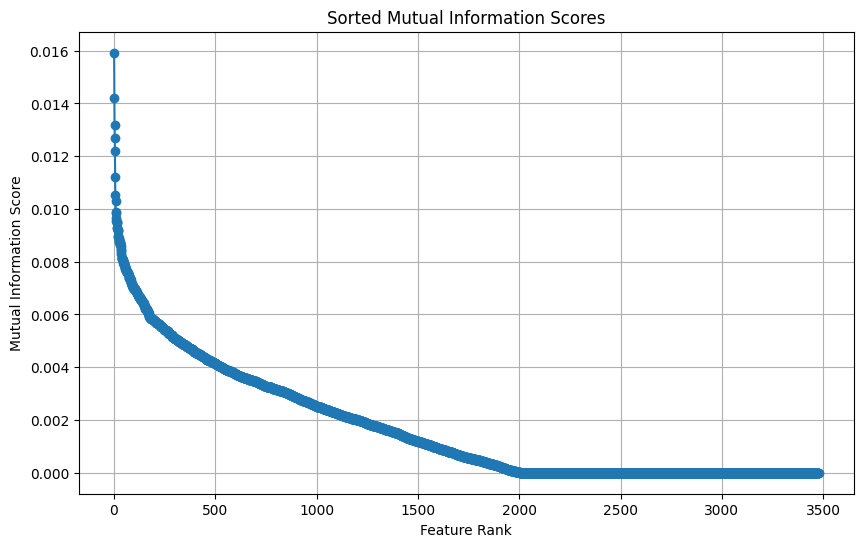


Estimated elbow point based on maximum drop: k = 2009

Using k = 2009 as the number of top features.

Top 2009 features selected by Mutual Information:
['mol_1_GRAVH', 'mol_2_GRAVHp', 'mol_1_ETA_shape_y', 'mol_1_MZ', 'mol_2_ATSC6s', 'mol_1_Mor02', 'mol_1_ATS1se', 'mol_2_WPSA2', 'mol_1_Mor32p', 'mol_1_Mor03p', 'mol_1_GRAVHp', 'mol_2_nG12FaRing', 'mol_2_MINsSH', 'mol_2_GRAVH', 'mol_2_AATS8i', 'mol_2_NddsN', 'mol_1_Mor05v', 'mol_2_NsBr', 'mol_1_MDEN-22', 'mol_2_VE3_D', 'mol_1_MATS5c', 'mol_2_n6AHRing', 'mol_1_AATS1s', 'mol_2_StCH', 'mol_2_MOMI-Y', 'mol_2_n12aRing', 'mol_1_AATS1dv', 'mol_2_NssssSi', 'mol_2_ATSC2are', 'mol_1_n11AHRing', 'mol_2_PPSA2', 'mol_1_AATSC8m', 'mol_2_AATSC2se', 'mol_1_AATSC0v', 'mol_2_SsssN', 'mol_1_Mor04se', 'mol_1_Mor11m', 'mol_1_NssCH2', 'mol_1_nBondsO', 'mol_1_Mor09', 'mol_2_MATS2se', 'mol_2_PNSA3', 'mol_1_Mor23', 'mol_1_Mor02se', 'mol_2_nG12FaHRing', 'mol_2_MATS1Z', 'mol_2_Mor10se', 'mol_1_AATSC2are', 'mol_2_MPC4', 'mol_1_PPSA5', 'mol_2_nH', 'mol_1_MATS4se', '

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# ---------------------------
# Phase 1: Mutual Information (Filter Method)
# ---------------------------

# Compute Mutual Information scores for each feature on the training set
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("\nMutual Information scores:")
print(mi_scores_series)

# Plot the sorted MI scores to visually inspect the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mi_scores_series.values) + 1), mi_scores_series.values, marker='o', linestyle='-')
plt.xlabel('Feature Rank')
plt.ylabel('Mutual Information Score')
plt.title('Sorted Mutual Information Scores')
plt.grid(True)
plt.show()

# ---------------------------
# Alternative Elbow Detection without kneed
# ---------------------------
# Compute the differences between consecutive MI scores
mi_values = mi_scores_series.values
diffs = np.diff(mi_values)

# Find the index where the drop is maximum
elbow_index = np.argmax(diffs) + 1  # +1 because np.diff reduces index by 1

print(f"\nEstimated elbow point based on maximum drop: k = {elbow_index}")

# Optionally, you could compare this to a default value if needed:
default_k = 600
k_value = elbow_index if elbow_index > 0 else default_k
print(f"\nUsing k = {k_value} as the number of top features.")

# Select the top k features based on the estimated elbow point
top_k_features = mi_scores_series.index[:k_value]
print(top_k_features.tolist())

top_features_df = pd.DataFrame(top_k_features, columns=["Feature"])
top_features_df.to_csv("mi_top_k_features.csv", index=False)
print("\nSaved top_k_features to 'mi_top_k_features.csv'")

# Reduce training and testing sets to the top k features
X_train_mi = X_train[top_k_features]
X_test_mi = X_test[top_k_features]


# SFS

In [ ]:
# ---------------------------
# Phase 2: Sequential Forward Selection (Wrapper Method)
# ---------------------------

# Choose a classifier; here, we use K-Nearest Neighbors.
# Alternatively, you can use Logistic Regression:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(max_iter=1000, random_state=42)

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Load the saved top_k_features from CSV
top_features_df = pd.read_csv("/kaggle/input/mi-top-176/mi_top_k_features.csv")
top_k_features = top_features_df["Feature"].tolist()
X_train = pd.read_csv("/kaggle/input/train-test/X_train.csv")
X_test = pd.read_csv("/kaggle/input/train-test/X_test.csv")
y_train = pd.read_csv("/kaggle/input/train-test/y_train.csv")

print("Top features loaded from CSV:")
print(top_k_features)

# Reduce the training and testing sets to only these features
X_train_mi = X_train[top_k_features]
X_test_mi = X_test[top_k_features]

# Choose a classifier; here, we use K-Nearest Neighbors.
classifier = KNeighborsClassifier(n_neighbors=5)

# Set up Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(classifier, 
                                n_features_to_select='auto',  # You can also set a specific number
                                direction='forward', 
                                scoring='accuracy', 
                                cv=5, 
                                n_jobs=-1)

# Fit SFS on the training data (using the MI-selected features)
sfs.fit(X_train_mi, y_train.values.ravel())

# Get the boolean mask and the selected feature names from SFS
selected_features_mask = sfs.get_support()
selected_features = X_train_mi.columns[selected_features_mask]
print("\nFeatures selected after Sequential Forward Selection:")
print(selected_features.tolist())


# Save the selected features to a CSV file
selected_features_df = pd.DataFrame(selected_features, columns=["Selected_Feature"])
selected_features_df.to_csv("/kaggle/working/sfs_5_knn_selected_features.csv", index=False)
print("\nSaved selected features to 'sfs_selected_features.csv'")


Top features loaded from CSV:
['mol_1_GRAVH', 'mol_2_GRAVHp', 'mol_1_ETA_shape_y', 'mol_1_MZ', 'mol_2_ATSC6s', 'mol_1_Mor02', 'mol_1_ATS1se', 'mol_2_WPSA2', 'mol_1_Mor32p', 'mol_1_Mor03p', 'mol_1_GRAVHp', 'mol_2_nG12FaRing', 'mol_2_MINsSH', 'mol_2_GRAVH', 'mol_2_AATS8i', 'mol_2_NddsN', 'mol_1_Mor05v', 'mol_2_NsBr', 'mol_1_MDEN-22', 'mol_2_VE3_D', 'mol_1_MATS5c', 'mol_2_n6AHRing', 'mol_1_AATS1s', 'mol_2_StCH', 'mol_2_MOMI-Y', 'mol_2_n12aRing', 'mol_1_AATS1dv', 'mol_2_NssssSi', 'mol_2_ATSC2are', 'mol_1_n11AHRing', 'mol_2_PPSA2', 'mol_1_AATSC8m', 'mol_2_AATSC2se', 'mol_1_AATSC0v', 'mol_2_SsssN', 'mol_1_Mor04se', 'mol_1_Mor11m', 'mol_1_NssCH2', 'mol_1_nBondsO', 'mol_1_Mor09', 'mol_2_MATS2se', 'mol_2_PNSA3', 'mol_1_Mor23', 'mol_1_Mor02se', 'mol_2_nG12FaHRing', 'mol_2_MATS1Z', 'mol_2_Mor10se', 'mol_1_AATSC2are', 'mol_2_MPC4', 'mol_1_PPSA5', 'mol_2_nH', 'mol_1_MATS4se', 'mol_1_ETA_dEpsilon_B', 'mol_2_Mor16v', 'mol_2_AATSC6m', 'mol_1_AATS2p', 'mol_2_TIC3', 'mol_1_SpMax_Dzse', 'mol_1_NdCH2', 'm

# Evaluation

In [3]:
# ---------------------------
# Evaluation: Train and Evaluate the Classifier on the Selected Features
# ---------------------------

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the features you just selected
sel_df = pd.read_csv("/kaggle/input/sfs-5-knn/sfs_5_knn_selected_features.csv")
selected = sel_df["Selected_Feature"].tolist()
X_train = pd.read_csv("/kaggle/input/train-test/X_train.csv")
X_test = pd.read_csv("/kaggle/input/train-test/X_test.csv")
y_train = pd.read_csv("/kaggle/input/train-test/y_train.csv")
y_test = pd.read_csv("/kaggle/input/train-test/y_test.csv")

# Subset train/test
X_train_sel = X_train[selected]
X_test_sel  = X_test[selected]
y_train_vec = y_train.values.ravel()

# Helper to evaluate any classifier
def evaluate(clf, name):
    clf.fit(X_train_sel, y_train_vec)
    y_pred = clf.predict(X_test_sel)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate the KNN you used in SFS
evaluate(KNeighborsClassifier(n_neighbors=5), "KNN (selected features)")



=== KNN (selected features) ===
Accuracy: 0.18459643359924918
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.27      0.22      2839
           1       0.19      0.19      0.19      2848
           2       0.18      0.16      0.17      2792
           3       0.19      0.16      0.17      2843
           4       0.18      0.20      0.19      2846
           5       0.20      0.13      0.16      2880

    accuracy                           0.18     17048
   macro avg       0.19      0.18      0.18     17048
weighted avg       0.19      0.18      0.18     17048

Confusion Matrix:
 [[771 477 423 377 501 290]
 [701 546 405 393 525 278]
 [708 480 457 360 501 286]
 [676 449 451 454 532 281]
 [708 497 417 364 556 304]
 [695 454 411 426 531 363]]

=== Logistic Regression (selected features) ===
Accuracy: 0.17450727358047866
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Flatten targets
y_train = pd.read_csv("/kaggle/input/train-test/y_train.csv").values.ravel()
y_test  = pd.read_csv("/kaggle/input/train-test/y_test.csv").values.ravel()

# Class distribution
print("Train class counts:\n", np.bincount(y_train))
print("Test class counts:\n", np.bincount(y_test))

# Baseline (majority‑class) accuracy
majority = np.argmax(np.bincount(y_train))
print("Baseline accuracy:", accuracy_score(y_test, np.full_like(y_test, majority)))


Train class counts:
 [6686 6579 6695 6635 6627 6556]
Test class counts:
 [2839 2848 2792 2843 2846 2880]
Baseline accuracy: 0.1637728765837635


# AutoML

In [3]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init(max_mem_size="8G")

# -------------------------------
# 1. Load Full Dataset
# -------------------------------
data_path = '/kaggle/input/mol-3d/mol_3d_descriptors_final.csv'
df = pd.read_csv(data_path)
print(f"Full dataset loaded with shape: {df.shape}")

target = "Potency_Change_Label"
non_feature_cols = ["canonical_smiles_1", "canonical_smiles_2", 
                    "Potency_Change", "Potency_Change_Category", "Potency_Change_Label"]

# -------------------------------
# 2. Helper Function to Load Feature List from CSV
# -------------------------------
def load_feature_list(file_path):
    df_feat = pd.read_csv(file_path)
    for col in ['Features', 'Selected_Feature', 'Feature']:
        if col in df_feat.columns:
            print(f"Using column '{col}' from {file_path}.")
            return df_feat[col].tolist()
    raise KeyError(f"None of the expected columns found in {file_path}.")

# -------------------------------
# 3. Function to Run AutoML on a Feature Subset with Train/Test Split
# -------------------------------
def run_automl_on_subset(df, feature_list, target, max_models=20, max_runtime_secs=600, seed=42):
    # Subset the DataFrame to only include the specified features and the target.
    subset_df = df[feature_list + [target]].copy()
    
    # Convert to H2OFrame and ensure the target is categorical.
    hf = h2o.H2OFrame(subset_df)
    hf[target] = hf[target].asfactor()
    
    # Split the H2OFrame into training and test sets (80/20 split)
    splits = hf.split_frame(ratios=[0.8], seed=seed)
    train_frame = splits[0]
    test_frame = splits[1]
    
    # Run H2O AutoML on the training set.
    aml = H2OAutoML(max_models=max_models, max_runtime_secs=max_runtime_secs, seed=seed)
    aml.train(x=feature_list, y=target, training_frame=train_frame)
    
    lb = aml.leaderboard
    # Evaluate the leader model on the test set.
    perf = aml.leader.model_performance(test_data=test_frame)
    # For multiclass classification, estimated accuracy can be approximated as 1 - mean_per_class_error.
    mean_class_error = perf.mean_per_class_error()
    estimated_accuracy = 1 - mean_class_error
    return aml, lb, estimated_accuracy, train_frame, test_frame

# -------------------------------
# 4. Define Feature Subsets to Evaluate
# -------------------------------
subset_files = {
    "variance": "/kaggle/input/features/selected_variance_0.8_features.csv",
    "common": "/kaggle/input/features/common_features.csv",
    "mi_features": "/kaggle/input/mi-top-176/mi_top_k_features.csv",
    "sfs": "/kaggle/input/sfs-5-knn/sfs_5_knn_selected_features.csv"
}

results = {}

# -------------------------------
# 5. Run AutoML for Each Feature Subset and Print Accuracy
# -------------------------------
for subset_name, file_path in subset_files.items():
    try:
        features = load_feature_list(file_path)
    except KeyError as e:
        print(e)
        continue

    # Ensure that each feature exists in the full dataset.
    features = [f for f in features if f in df.columns]
    if not features:
        print(f"No matching features found for subset '{subset_name}'. Skipping...")
        continue

    print(f"\nRunning AutoML for subset '{subset_name}' with {len(features)} features...")
    aml, lb, est_accuracy, train_frame, test_frame = run_automl_on_subset(df, features, target)
    results[subset_name] = {"aml": aml, "leaderboard": lb, "accuracy": est_accuracy}
    print(f"Leaderboard for subset '{subset_name}':")
    print(lb.head(lb.nrows))
    print(f"Estimated Accuracy for subset '{subset_name}': {est_accuracy:.4f}")


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,51 mins 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 21 days
H2O_cluster_name:,H2O_from_python_unknownUser_ftwtf9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.359 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


<ipython-input-3-21f075fb17a6>:12: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,58,59,60,61,62,63,64,65,66,147,156,157,158,159,160,161,162,163,164,165,174,183,192,201,210,219,228,237,238,239,240,241,242,243,244,245,246,265,266,267,268,269,270,271,272,273,346,347,348,349,350,351,352,353,354,363,372,373,374,375,376,377,378,379,380,381,390,399,408,417,426,435,444,453,454,455,456,457,458,459,460,461,469,477,478,479,480,481,482,483,484,485,493,501,509,517,525,533,541,549,550,551,552,553,554,555,556,557,565,573,574,575,576,577,578,579,580,581,589,597,605,613,621,629,637,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,

Full dataset loaded with shape: (56826, 3659)
Using column 'Features' from /kaggle/input/features/selected_variance_0.8_features.csv.

Running AutoML for subset 'variance' with 1930 features...
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Leaderboard for subset 'variance':
model_id                             mean_per_class_error    logloss      rmse       mse
XGBoost_1_AutoML_4_20250323_90504                0.833381    1.86639  0.835322  0.697763
[1 row x 5 columns]

Estimated Accuracy for subset 'variance': 0.1727
Using column 'Features' from /kaggle/input/features/common_features.csv.

Running AutoML for subset 'common' with 501 features...
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Leaderboard f

AttributeError: 'NoneType' object has no attribute 'model_performance'